# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

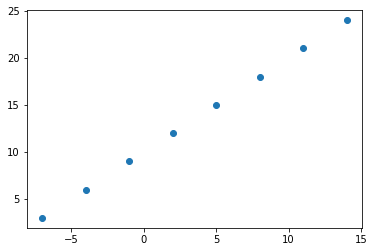

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price =  tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape 

(TensorShape([]), TensorShape([]))

##  Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to imterpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and lables).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),  # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 503ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred =  model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (100 epochs)
model.fit(tf.expand_dims(X, axis = 1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 267ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Let's see if our model's prediction has improved

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# with extra hidden layer 100 units

# create
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation= None),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis = 1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 417ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss:

In [ ]:
# Let's try to make a prediction

model.predict([17.0])

array([[26.58353]], dtype=float32)

## Evaluating a model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

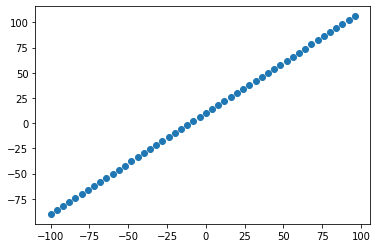

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
# Check the length of how many samples we have

len(X)

50

In [ ]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are the training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

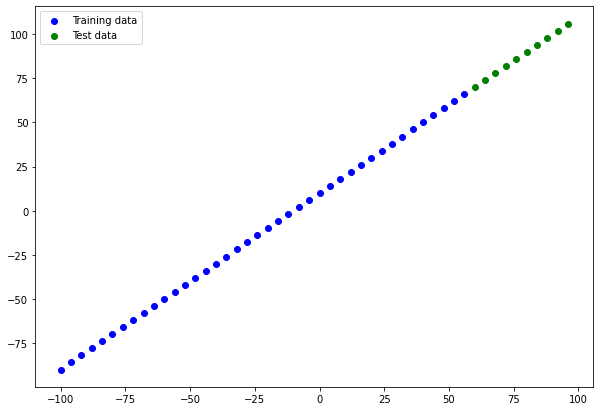

In [ ]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data")

# plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Test data")

# show a legend
plt.legend();

### Visualizing the model

In [ ]:
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape = [1]),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis = 1),y, epochs=100, verbose = 0)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Plotting the model

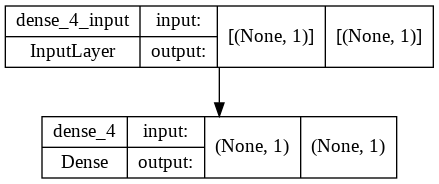

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [ ]:
# create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
        tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


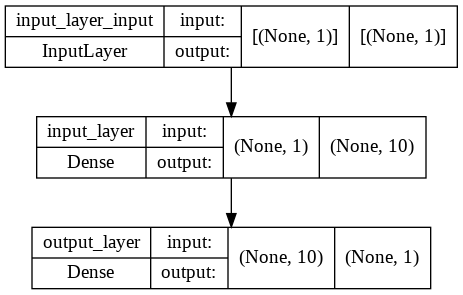

In [ ]:
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.48064 ],
       [ 75.06516 ],
       [ 79.64968 ],
       [ 84.234215],
       [ 88.81873 ],
       [ 93.40325 ],
       [ 97.98778 ],
       [102.5723  ],
       [107.15683 ],
       [111.741356]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# plotting fuction 

def plot_prediction(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  plt.figure(figsize=(10,7))
  # plotting the training data
  plt.scatter(train_data, train_labels, c = "b", label = "Training Data")
  # plot testing data
  plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
  # plot prediction data
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # show legend
  plt.legend();

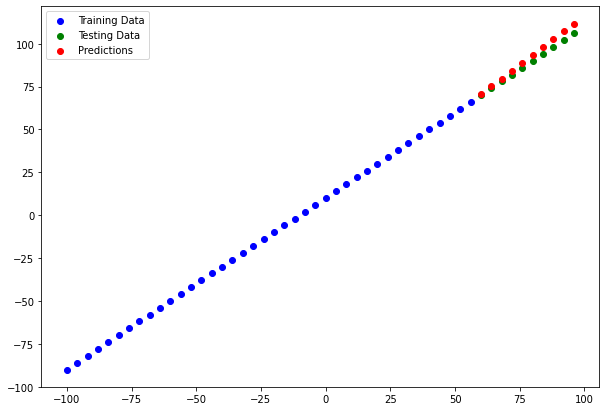

In [ ]:
plot_prediction()

### Evauating our model's predictions with regression evaluation metrics

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 3.1110 - mae: 3.1110


[3.1109938621520996, 3.1109938621520996]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.61549 , 14.160902, 11.740128, 10.353157, 10.      , 10.680651,
       12.395111, 15.257843, 19.15683 , 23.741356], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.48064 ],
       [ 75.06516 ],
       [ 79.64968 ],
       [ 84.234215],
       [ 88.81873 ],
       [ 93.40325 ],
       [ 97.98778 ],
       [102.5723  ],
       [107.15683 ],
       [111.741356]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.48064 ,  75.06516 ,  79.64968 ,  84.234215,  88.81873 ,
        93.40325 ,  97.98778 , 102.5723  , 107.15683 , 111.741356],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.497052>

In [ ]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# complile
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X_train, axis = 1),y_train, epochs=100, verbose = 0)

In [ ]:
# make and plot predictions for model_1

X_test_2ndims = tf.expand_dims(X_test, axis = 1)
y_preds_1 = model_1.predict(X_test_2ndims)

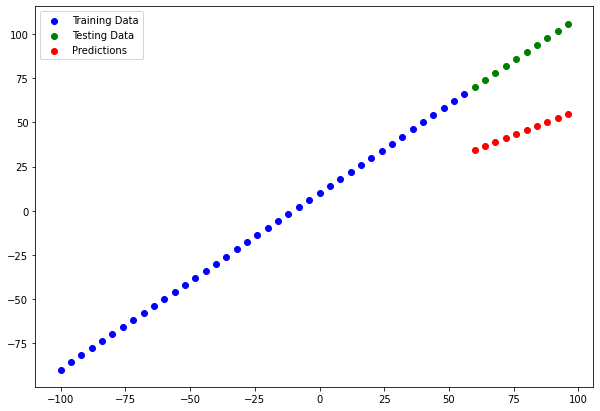

In [ ]:
plot_prediction(predictions=y_preds_1)

In [ ]:
# model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=43.535328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1919.7249>)

In [ ]:
# random seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# compile
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# fit the model
model.fit(tf.expand_dims(X_train, axis = 1),y_train, epochs=100, verbose = 0)

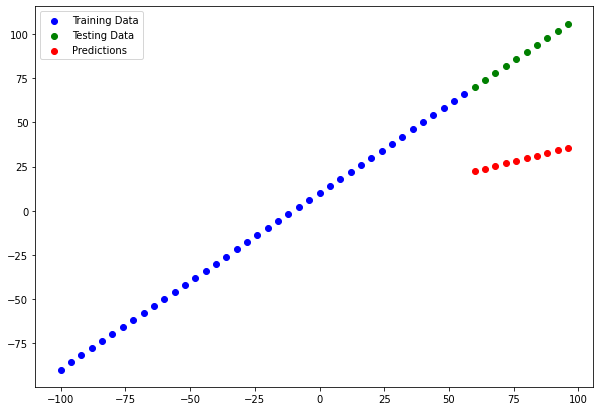

In [ ]:
# plot and prediction of model_2

y_preds_2 = model_2.predict(X_test_2ndims)

y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [ ]:
# model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=59.02484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3536.0774>)

In [ ]:
# random seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# compile
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X_train, axis = 1),y_train, epochs=500, verbose = 0)

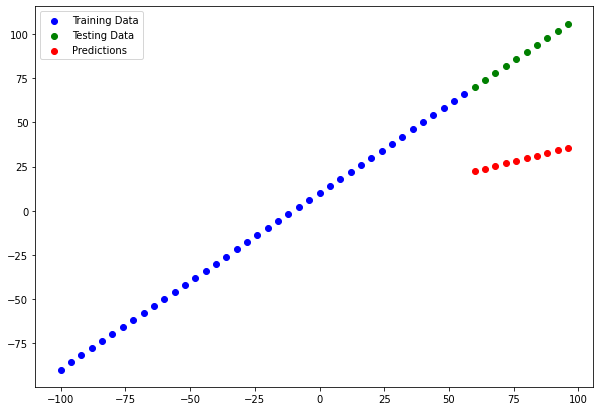

In [ ]:
# plot and prediction of model_3

y_preds_3 = model_3.predict(X_test_2ndims)
plot_prediction(predictions = y_preds_3)

In [ ]:
# model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=59.02484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3536.0774>)

## Comparing the results of our experiments

In [ ]:
# Let's compare our  model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,43.535328,1919.724854
1,model_2,59.024841,3536.077393
2,model_3,59.024841,3536.077393


## Saving the models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

In [ ]:
# saved model format

model_2.save("model 2")

INFO:tensorflow:Assets written to: model 2/assets


In [ ]:
# HDF5 model format

model_3.save("model 2.h5")

## Loading a saved model

In [ ]:
# load saved model format

loaded_savedModel_format = tf.keras.models.load_model("/content/model 2")
loaded_savedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with savedModel format predictions

model_2_preds = model_2.predict(X_test_2ndims)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test_2ndims)
model_2_preds, loaded_savedModel_format_preds

(array([[22.288586],
        [23.774488],
        [25.260393],
        [26.7463  ],
        [28.232204],
        [29.718111],
        [31.204018],
        [32.68992 ],
        [34.175823],
        [35.66173 ]], dtype=float32), array([[22.288586],
        [23.774488],
        [25.260393],
        [26.7463  ],
        [28.232204],
        [29.718111],
        [31.204018],
        [32.68992 ],
        [34.175823],
        [35.66173 ]], dtype=float32))

In [ ]:
model_2_preds == loaded_savedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Large example

In [62]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# read the dataset in csv

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
insurance["sex"], insurance["smoker"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object)

In [65]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
